## Perceptron wielowarstwowy
#### do predykcji *czego właściwie?*
Maciej Komosa, Informatyka i Ekonometria, 3 rok, stacjonarnie, WZ AGH

1. Importowanie bibliotek oraz kodu funkcji aktywacji

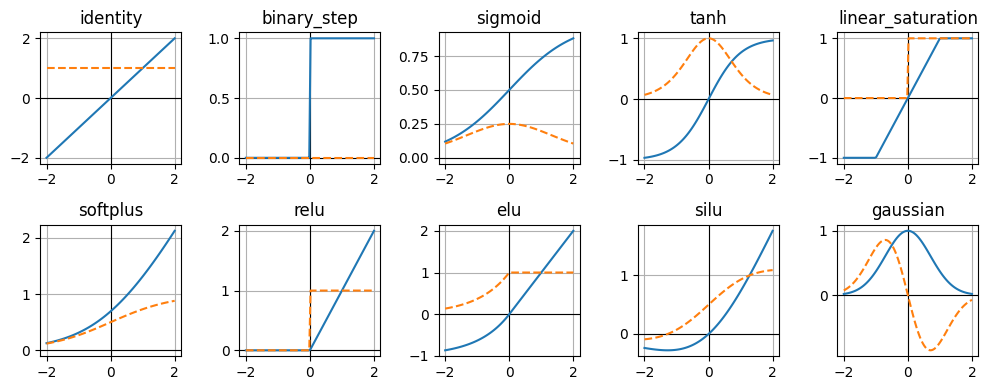

In [3]:
import numpy as np
from tqdm import tqdm
from sklearn import datasets
%run Projekt_SSN.ipynb

In [4]:
class neuron:
    def __init__(self, wagi, bias, funkcja_aktywacji):
        self.wagi = wagi
        self.bias = bias
        self.funkcja_aktywacji = funkcja_aktywacji
        self.wejscie = []
        self.wyjscie = 0
        self.delta = 0

    def naprzod(self, wejscie):
        self.wejscie = wejscie
        self.wyjscie = np.dot(self.wagi, wejscie) + self.bias
        return self.funkcja_aktywacji(self.wyjscie)

    def wstecz(self, blad, wspolczynnik_uczenia):
        self.delta = blad * self.funkcja_aktywacji(self.wyjscie, pochodna=True)
        gradient_wagi = np.dot(self.delta, self.wejscie)
        gradient_bias = self.delta
        # print('self.delta= ', self.delta,
        #     'self.wagi= ', self.wagi, 
        #         'wsp ucz= ', wspolczynnik_uczenia,
        #         'gradient_wagi= ', gradient_wagi,
        #         'dot= ', np.dot(wspolczynnik_uczenia, gradient_wagi))
        self.wagi -= np.dot(wspolczynnik_uczenia, gradient_wagi) 
        self.bias -= np.dot(wspolczynnik_uczenia, gradient_bias)
        return self.wagi * self.delta
        

class wielowarstwowy_perceptron:
    def __init__(self, n_warstw, n_neuronow, n_wejsc, n_wyjsc, funkcja_aktywacji):
        self.warstwy = []
        for i in range(n_warstw):
            warstwa = []
            for j in range(n_neuronow):
                if i == 0:
                    warstwa.append(neuron(np.random.rand(n_wejsc), np.random.rand(), funkcja_aktywacji))
                else:
                    warstwa.append(neuron(np.random.rand(n_neuronow), np.random.rand(), funkcja_aktywacji))
            self.warstwy.append(warstwa)
        warstwa = []
        for i in range(n_wyjsc):
            warstwa.append(neuron(np.random.rand(n_neuronow), np.random.rand(), funkcja_aktywacji))
        self.warstwy.append(warstwa)
        self.funkcja_aktywacji = funkcja_aktywacji


    def naprzod(self, wejscie):
        for warstwa in self.warstwy:
            for neuron in warstwa:
                neuron.naprzod(wejscie)
        return self.warstwy[-1][0].wyjscie

    def wstecz(self, wejscie, wspolczynnik_uczenia):
        
        blad = (self.warstwy[-1][0].wyjscie - wejscie) * self.funkcja_aktywacji(self.warstwy[-1][0].wyjscie, pochodna=True)
        # ostatnia warstwa posiada jeden neuron
        self.warstwy[-1][0].wstecz(wejscie, wspolczynnik_uczenia=wspolczynnik_uczenia)
        # propagacja błędu wstecz
        for warstwa in reversed(self.warstwy[:-1]):
            for neuron in warstwa:
                blad = neuron.wstecz(blad, wspolczynnik_uczenia=wspolczynnik_uczenia)



def trenuj(model, X, y, n_okresow, wspolczynnik_uczenia):
    for _ in tqdm(range(n_okresow)):
        for xi, yi in zip(X, y):
            model.naprzod(xi)
            model.wstecz(yi, wspolczynnik_uczenia=wspolczynnik_uczenia)


def test(model, X, y):
    for xi, yi in zip(X, y):
        wyjscie = model.naprzod(xi)
        print("Input: {} Output: {} Expected: {}".format(xi, wyjscie, yi))

dane = datasets.load_iris()
# podziel na dane treningowe i testowe
X = dane.data
y = dane.target
X_trenujace = X[1::3] + X[2::3]
y_trenujace = y[1::3] + y[2::3]
X_test = X[::3]
y_test = y[::3]

model = wielowarstwowy_perceptron(n_warstw=2, n_neuronow=4, n_wejsc=4, n_wyjsc=1, funkcja_aktywacji=sigmoid)
trenuj(model, X_trenujace, y_trenujace, 100, 0.1)
test(model, X_test, y_test)

100%|██████████| 100/100 [00:00<00:00, 214.64it/s]

Input: [5.1 3.5 1.4 0.2] Output: -5.311582734313422 Expected: 0
Input: [4.6 3.1 1.5 0.2] Output: -4.757789298353251 Expected: 0
Input: [4.6 3.4 1.4 0.3] Output: -4.862323015770634 Expected: 0
Input: [4.9 3.1 1.5 0.1] Output: -5.002826083328874 Expected: 0
Input: [4.8 3.  1.4 0.1] Output: -4.884912936894619 Expected: 0
Input: [5.7 4.4 1.5 0.4] Output: -6.136445672532007 Expected: 0
Input: [5.7 3.8 1.7 0.3] Output: -5.944397516802672 Expected: 0
Input: [5.1 3.7 1.5 0.4] Output: -5.405701308444652 Expected: 0
Input: [4.8 3.4 1.9 0.2] Output: -5.025218950523106 Expected: 0
Input: [5.2 3.5 1.5 0.2] Output: -5.399976989901214 Expected: 0
Input: [4.8 3.1 1.6 0.2] Output: -4.933535575301393 Expected: 0
Input: [5.5 4.2 1.4 0.2] Output: -5.867623055680076 Expected: 0
Input: [5.5 3.5 1.3 0.2] Output: -5.6599485855273866 Expected: 0
Input: [5.1 3.4 1.5 0.2] Output: -5.2831060776943986 Expected: 0
Input: [4.4 3.2 1.3 0.2] Output: -4.610519678024133 Expected: 0
Input: [4.8 3.  1.4 0.3] Output: -4.91